本文主要用「药品销售数据集」来演示数据分析的基本流程和思路。

### 数据分析常规流程

常规流程更多是业务数据分析层面，需要涉及的内容。主要包括：

> - 数据概览
>   1. 数据基本信息查看
>   2. 数据描述性信息
>   3. 数据缺失值检查
>   4. 数据重复值检查（部分字段的唯一性，例如：订单编号）
>   5. 数据唯一性检查（例如：订单状态和系统需要契合）
>
>
> - 数据清洗
>   1. 选择数据子集
>   2. 重复值处理
>   3. 缺失值处理
>   4. 特征选取
>   5. 数据标准化
>
>
> - 数据探索
>   1. 单个字段列表时间维度分析
>   2. 两个字段对比分析
>   3. 两个分类对别分析
>   4. 相关性分析
>   5. 预测、分类


以上是常规的数据分析需要涉及的内容。接下来以「药品数据集」为例，看看具体在案例中如何应用。


### 分析目的

- 数据源：朝阳医院 2018 年销售数据集
- 数据字段：购药时间、社保卡号、商品编码、商品名称、销售数量、应收金额、实收金额
- 分析目的：
    1. 查看药品销售情况，需要分别了解：月均消费次数，月均消费金额、客单价
    2. 查看消费趋势：每天/每月/每季度消费金额趋势情况
    3. 查看整体数据中，销量最好的商品；在每个月中，销量最好的商品
    4. 查看应收金额和实收金额的差距，是否有大的波动，还是属于平稳。如果有大的波动，是否是有其他原因引起
    5. 消费次数是否有日期的规律

### 案例

In [1]:
import numpy as np
import pandas as pd
from pandas import Series
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df = pd.read_excel("/data/朝阳医院2018年销售数据.xlsx")
df['社保卡号'] = df['社保卡号'].astype(np.str)
df['商品编码'] = df['商品编码'].astype(np.str)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/huanglong/Documents/data/朝阳医院2018年销售数据.xlsx'

### 数据概览

In [2]:
#  数据基本信息
print(df.info())
print("--------------")

# 数据描述性统计
print(df.describe())
print("--------------")

# 数据缺失值查看
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   购药时间    6576 non-null   object 
 1   社保卡号    6578 non-null   object 
 2   商品编码    6578 non-null   object 
 3   商品名称    6577 non-null   object 
 4   销售数量    6577 non-null   float64
 5   应收金额    6577 non-null   float64
 6   实收金额    6577 non-null   float64
dtypes: float64(3), object(4)
memory usage: 359.9+ KB
None
--------------
         销售数量    应收金额    实收金额
count 6577.00 6577.00 6577.00
mean     2.39   50.47   46.32
std      2.38   87.60   80.98
min    -10.00 -374.00 -374.00
25%      1.00   14.00   12.32
50%      2.00   28.00   26.60
75%      2.00   59.60   53.00
max     50.00 2950.00 2650.00
--------------
购药时间    2
社保卡号    0
商品编码    0
商品名称    1
销售数量    1
应收金额    1
实收金额    1
dtype: int64


### 数据清洗

In [3]:
# 缺失值处理：删除缺失行
df = df.dropna()

# 拆分购药时间字段
df['month'] = df['购药时间'].str[0:7]
df['星期时间'] = df['购药时间'].str[11:14]
df['购药时间'] = df['购药时间'].str[0:10]

# 使用rename函数，把"购药时间" 改为 "销售时间"
df.rename(columns={'购药时间':'销售时间'}, inplace=True) 
df.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额,month,星期时间
0,2018-01-01,1616528.0,236701.0,强力VC银翘片,6.00,82.80,69.00,2018-01,星期五
1,2018-01-02,1616528.0,236701.0,清热解毒口服液,1.00,28.00,24.64,2018-01,星期六
2,2018-01-06,12602828.0,236701.0,感康,2.00,16.80,15.00,2018-01,星期三
3,2018-01-11,10070343428.0,236701.0,三九感冒灵,1.00,28.00,28.00,2018-01,星期一
4,2018-01-15,101554328.0,236701.0,三九感冒灵,8.00,224.00,208.00,2018-01,星期五


In [4]:
# 把销售时间转换为datetime格式。errors='coerce' 出现2月30日这种日期情况，仍然强制转换，并且该行的时间为NAN
df['销售时间'] = pd.to_datetime(df['销售时间'],format='%Y-%m-%d',errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6576 entries, 0 to 6577
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   销售时间    6553 non-null   datetime64[ns]
 1   社保卡号    6576 non-null   object        
 2   商品编码    6576 non-null   object        
 3   商品名称    6576 non-null   object        
 4   销售数量    6576 non-null   float64       
 5   应收金额    6576 non-null   float64       
 6   实收金额    6576 non-null   float64       
 7   month   6576 non-null   object        
 8   星期时间    6576 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 513.8+ KB


In [5]:
# 删除销售时间为NAN的行
df = df.dropna()

# 重新按照销售时间升序
df = df.sort_values(by='销售时间', ascending=True)

# 重置索引
df = df.reset_index(drop=True)

# 取销售数量大于0的数据
df = df[df['销售数量'] > 0]

# 删除重复数据
df = df.drop_duplicates(subset=['销售时间','社保卡号'])
df.head()

,销售时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额,month,星期时间
0,2018-01-01,1616528.0,236701.0,强力VC银翘片,6.00,82.80,69.00,2018-01,星期五
1,2018-01-01,11743428.0,861405.0,苯磺酸氨氯地平片(络活喜),1.00,34.50,31.00,2018-01,星期五
2,2018-01-01,103283128.0,861464.0,复方利血平片(复方降压片),1.00,2.50,2.20,2018-01,星期五
3,2018-01-01,12697828.0,861464.0,复方利血平片(复方降压片),4.00,10.00,9.40,2018-01,星期五
4,2018-01-01,107891628.0,868107.0,厄贝沙坦氢氯噻嗪片(安博诺),1.00,38.80,35.00,2018-01,星期五


### 数据分析

In [6]:
# 计算月均消费次数
total = df.shape[0]
startTime = df.loc[0,'销售时间']
endTime = df.loc[total-1,'销售时间']

# 计算数据一共的天数
days = (endTime-startTime).days

# 月份数：运算符"//"表示取整除，返回商的整数部分
months = days // 30

# 计算月均消费单数
averageMonth = total // months
print('月均消费单数:', averageMonth)
print("--------------")

# 月均消费金额
totalMoney = df['实收金额'].sum()
monthMoney = totalMoney // months
print('月均消费金额:', monthMoney)
print("--------------")


# 客单价 = 总消费金额 / 总消费次数
pct = totalMoney / total
print('客单价:', round(pct,2))



月均消费单数: 1069
--------------
月均消费金额: 47216.0
--------------
客单价: 8.83


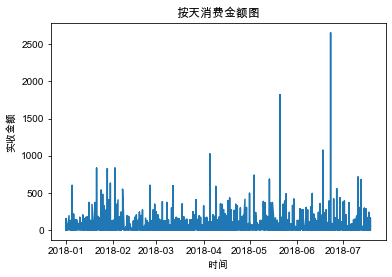

In [7]:
# 每天消费金额趋势
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = ['Arial Unicode MS'] 

# 复制一份数据，避免后续错误
groupDf = df

# 将销售时间设为index，方便处理时间
groupDf = groupDf.set_index('销售时间')

plt.plot(groupDf['实收金额'])
plt.title('按天消费金额图')
plt.xlabel('时间')
plt.ylabel('实收金额')
plt.show()

从每天的消费趋势图来看，把每天的实收金额放到一个周期（看起来是一周），有周期性波动。

In [8]:
# 每月消费金额趋势
# 将销售时间聚合按月分组
mGroup = groupDf.groupby(groupDf.index.month)
monthDf = mGroup.sum()
monthDf

,销售数量,应收金额,实收金额
销售时间,,,
1,1981.00,41318.30,37940.64
2,1458.00,31099.80,28499.67
3,1836.00,36403.00,33229.86
4,2467.00,42691.40,38111.36
5,1758.00,39933.00,36318.01
6,1860.00,42169.90,38784.95
7,1189.00,25260.90,23195.99


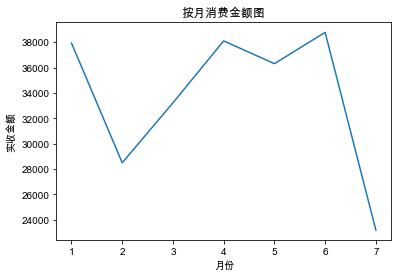

In [9]:
# 描绘按月消费金额图
plt.plot(monthDf['实收金额'])
plt.title('按月消费金额图')
plt.xlabel('月份')
plt.ylabel('实收金额')
plt.show()

- 从上图的可以看到：6月的消费金额最多。另外因为7月数据不全，所以7月数据比较低。2月最低（估计2月是春节假期？）。
- 顺便说下 df.index.quarter 用法，可以换成月度、季度等时间维度都可以，如果以时间维度看数据，使用比较方便。
- 案例中直接查看季度数据，虽然季度数据不全，主要看下季度下的数据展示情况。

In [10]:
# 每季度消费金额趋势
quarter = groupDf.groupby(groupDf.index.quarter)
quarterDf =  quarter.sum()
quarterDf

,销售数量,应收金额,实收金额
销售时间,,,
1,5275.00,108821.10,99670.17
2,6085.00,124794.30,113214.32
3,1189.00,25260.90,23195.99


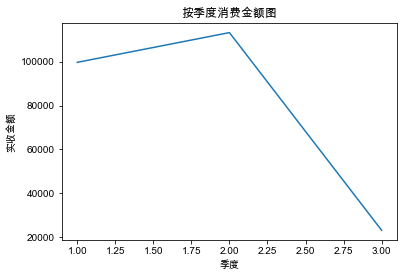

In [11]:
# 描绘按月消费金额图
plt.plot(quarterDf['实收金额'])
plt.title('按季度消费金额图')
plt.xlabel('季度')
plt.ylabel('实收金额')
plt.show()

In [12]:
# 对药品销售前10的情况


# 聚合统计各种药品的销售数量
medicine = groupDf[['商品名称','销售数量']]
re_medicine = medicine.groupby('商品名称')[['销售数量']].sum()


# 对药品销售数量按降序排序
re_medicine = re_medicine.sort_values(by='销售数量',ascending=False)

# 截取销售数量最多的十种药品
top_medicine = re_medicine.iloc[:10,:]
top_medicine

,销售数量
商品名称,
苯磺酸氨氯地平片(安内真),1611.00
开博通,1232.00
酒石酸美托洛尔片(倍他乐克),929.00
硝苯地平片(心痛定),702.00
苯磺酸氨氯地平片(络活喜),591.00
复方利血平片(复方降压片),393.00
缬沙坦胶囊(代文),375.00
G琥珀酸美托洛尔缓释片(倍他乐克),350.00
非洛地平缓释片(波依定),288.00


In [13]:
# 每个月销售最多的药品

b = df.groupby(['month', '商品名称'])['销售数量'].count().reset_index()
b['month'] = pd.to_datetime(b['month'])

bdf = b.set_index('month')
bdf.resample('m').max()

,商品名称,销售数量
month,,
2018-01-31,高特灵,116
2018-02-28,高特灵,85
2018-03-31,高特灵,113
2018-04-30,高特灵,274
2018-05-31,高特灵,101
2018-06-30,高特灵,81
2018-07-31,高特灵,54


每个月卖的得最多的药品是「高特灵」，查了下这是一种治疗高血压的药。所以看起来这个药每个月销量最高也很正常。

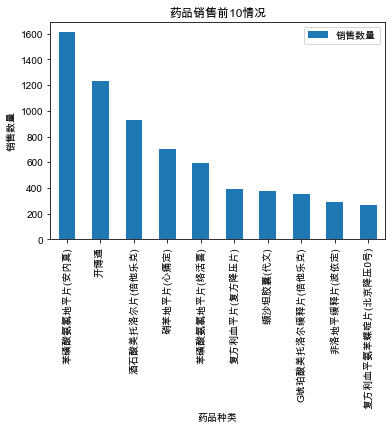

In [14]:
# 用条形图展示销售数量前十的药品
top_medicine.plot(kind='bar')
plt.title('药品销售前10情况')
plt.xlabel('药品种类')
plt.ylabel('销售数量')
plt.legend(loc=0)
plt.show()

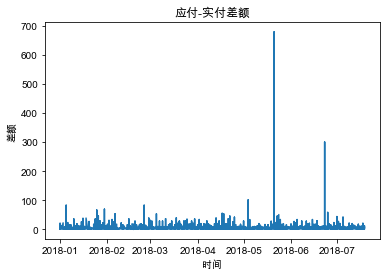

In [15]:
# 应付与实付差额情况
groupDf['balance'] = groupDf['应收金额'] - groupDf['实收金额']

plt.plot(groupDf['balance'])
plt.title('应付-实付差额')
plt.xlabel('时间')
plt.ylabel('差额')
plt.show()

差额基本比较稳定，但是有一些差额巨大的极端情况出现，这里做具体业务需要查看对应明细，找到原因。

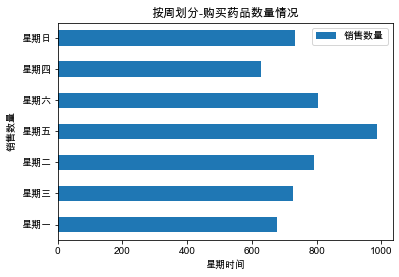

In [16]:
# 每周销售最多的商品数量
# 按照每周销售的药品情况进行分组
week = groupDf.groupby('星期时间')['销售数量'].count().reset_index()

# barn可视化展示
week.plot('星期时间','销售数量',kind='barh')
plt.title('按周划分-购买药品数量情况')
plt.xlabel('销售数量')
plt.ylabel('星期时间')
plt.legend(loc=0)
plt.show()

从数据上来看，每周五购买药品数量最多，很多是选在周末前购买，这个数据基本和实际用户行为吻合。